<a href="https://colab.research.google.com/github/Ubaton/Database-Management/blob/master/Mango_And_Apple_Leaf_Classifie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [158]:
# Function to load and resize images
def load_and_resize_images(image_paths, target_size):
    resized_images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img = img.resize(target_size, Image.ANTIALIAS)
        resized_images.append(np.array(img) / 255.0)  # Normalize and add to the list
    return resized_images

In [159]:
# List of image file paths for "Mango" and "Apple" datasets
mango_image_paths = [
    '/content/sample_data/mango1.jpeg',
    '/content/sample_data/mango2.jpeg',
    '/content/sample_data/mango3.jpeg',
    '/content/sample_data/mango4.jpeg',
    '/content/sample_data/mango5.jpeg',
    # Add more "Mango" image paths here
]

In [160]:
apple_image_paths = [
    '/content/sample_data/apple1.jpg',
    '/content/sample_data/apple2.jpg',
    '/content/sample_data/apple3.jpg',
    '/content/sample_data/apple4.jpg',
    '/content/sample_data/apple5.jpg',
    # Add more "Apple" image paths here
]

In [161]:
# Combine "Mango" and "Apple" image paths
image_paths = mango_image_paths + apple_image_paths

In [162]:
# Labels for "Mango" and "Apple" datasets
mango_labels = [0] * len(mango_image_paths)
apple_labels = [1] * len(apple_image_paths)

In [163]:
# Combine "Mango" and "Apple" labels
labels = mango_labels + apple_labels

In [164]:
# Target size for resizing
target_size = (100, 100)  # Change this to your desired size

In [165]:
# Load and resize images
resized_images = load_and_resize_images(image_paths, target_size)

<ipython-input-158-f2f3e28c8c0e>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [166]:
# Define the number of classes in your dataset
num_classes = 2  # Two classes: "Mango" and "Apple"

In [167]:
# Split the combined dataset into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [168]:
X_train, X_temp, y_train, y_temp = train_test_split(resized_images, labels, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)


In [169]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [170]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [171]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [172]:
# Fit the model
model.fit(np.array(X_train), y_train, epochs=10, validation_data=(np.array(X_val), y_val))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6872 - accuracy: 0.5000 - val_loss: 2.6457 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 184ms/step - loss: 0.6285 - accuracy: 0.6667 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 208ms/step - loss: 1.8522 - accuracy: 0.5000 - val_loss: 0.6414 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 185ms/step - loss: 0.2291 - accuracy: 1.0000 - val_loss: 2.3722 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 192ms/step - loss: 0.4082 - accuracy: 0.8333 - val_loss: 2.2630 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 181ms/step - loss: 0.3464 - accuracy: 0.8333 - val_loss: 1.1738 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 178ms/step - loss: 0.1710 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 1.0000
Epoch 8

In [173]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(np.array(X_test), y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 39ms/step - loss: 0.5233 - accuracy: 1.0000
Test accuracy: 100.00%


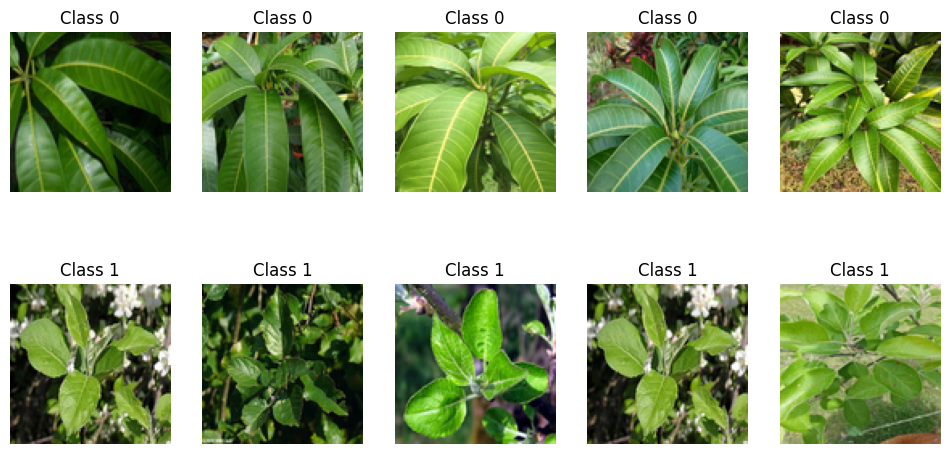

In [179]:
# Display a few sample images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.title(f'Class {labels[i]}')
    plt.axis('off')

# Display a few sample apple images
for i in range(5, 10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.title(f'Class {labels[i]}')
    plt.axis('off')

plt.show()

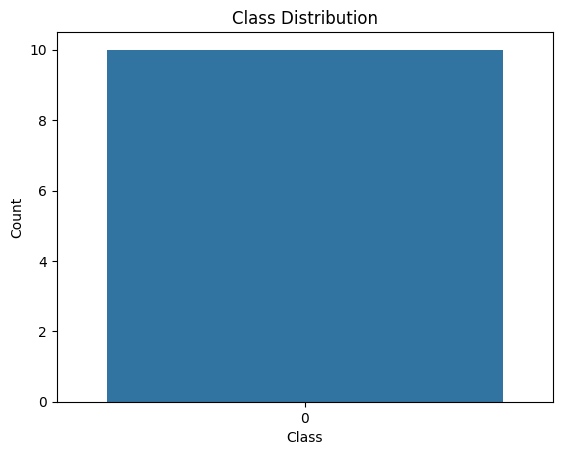

In [175]:
# Count the number of samples per class
class_counts = sns.countplot(labels)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [176]:
# Flatten the images (convert each image to a 1D array)
flattened_images = [image.flatten() for image in resized_images]

In [177]:
# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

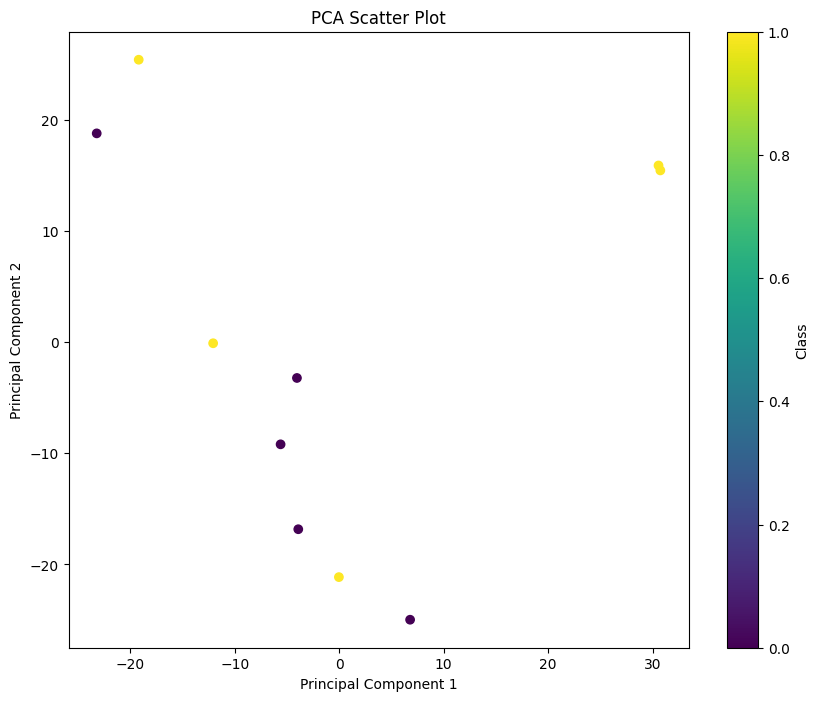

In [178]:
# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, label='Class')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()